In [381]:
#importing libraries and dataset
import pandas as pd
import math
import statistics as stat
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

#importing datasets

df_ratings = pd.read_csv("ratings.csv")

df_links = pd.read_csv("links.csv")
df_movies = pd.read_csv("movies.csv")
df_tags = pd.read_csv("tags.csv")


In [382]:
#rating data_Set head till 10 rows
df_ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [383]:
#summary of dataset
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [384]:
print("Count or Shape of ratings data set is" + str(df_ratings.shape))
print("Number of unique users are: ", df_ratings['userId'].nunique())
print("Number of movies are: ", df_ratings['movieId'].nunique())
print("Unique Ratings are: ", sorted(df_ratings['rating'].unique()))

Count or Shape of ratings data set is(100836, 4)
Number of unique users are:  610
Number of movies are:  9724
Unique Ratings are:  [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


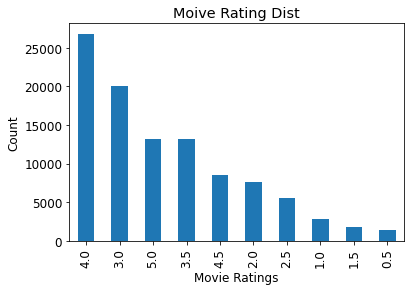

In [385]:
# most rating number given by users
plt.rc('font',size=12)
df_ratings.rating.value_counts(sort=True).plot(kind='bar')
plt.title('Moive Rating Dist')
plt.xlabel('Movie Ratings')
plt.ylabel('Count')
plt.show()

In [386]:
#here I merge movies dataset and ratings dataset
df=pd.merge(df_ratings,df_movies, on='movieId', how='inner')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [387]:
#making a table dataframe which has movie name and there mean ratings and total count 

df_avg_ratings=df.groupby('title').agg(ratings_count=('rating','count'),ratings_mean=('rating','mean')).reset_index()

#sort by rating count to find which are the most rated movie
df_avg_ratings.sort_values(by='ratings_count',ascending=False).head()

,title,ratings_count,ratings_mean
3158,Forrest Gump (1994),329,4.164134
7593,"Shawshank Redemption, The (1994)",317,4.429022
6865,Pulp Fiction (1994),307,4.197068
7680,"Silence of the Lambs, The (1991)",279,4.161290
5512,"Matrix, The (1999)",278,4.192446


In [388]:
df_merge = pd.merge(df,df_avg_ratings[['title']], on='title', how='inner')
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [389]:
#creating user base matrix
user_matrix=df.pivot_table(index='userId',columns='title', values='rating')

#taking pearson similarity correlation
user_sim=user_matrix.T.corr('pearson')
user_sim.head()


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,0.091574,-2.071128e-16,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,NaN,1.0,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-0.387347,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.125000,NaN,0.623288
3,0.079819,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562
4,0.207983,NaN,NaN,1.000000,-0.336525,0.148498,0.542861,0.117851,NaN,0.485794,...,-0.222113,3.966413e-01,0.090090,-0.080296,0.400124,0.144603,0.116518,-0.170501,-0.277350,-0.043786
5,0.268749,NaN,NaN,-0.336525,1.000000,0.043166,0.158114,0.028347,NaN,-0.777714,...,0.000000,1.533034e-01,0.234743,0.067791,-0.364156,0.244321,0.231080,-0.020546,0.384111,0.040582


In [390]:
#Making a sub-group of 3 similar users for USERId:1

#User ID:1 similairty row
user_sim1=user_sim[user_sim.index==1]

In [391]:
user=1
#drop this user from the user_sim table
sim1=user_sim.copy()
sim1.drop(index=user, inplace = True)

In [392]:
#check 3  similar users as compared to target user 1

u=8          #find 3 similar_user randonly out of 8
user_thrsh = 0.01
#user which has similarity more than 0.05 only
simuser1=sim1[sim1[user]>user_thrsh][user].sort_values(ascending=False)[:u]


print("similar user for "+ str(user) + " are "+ str(simuser1.head(8)))

similar user for 1 are userId
550    1.000000
146    1.000000
106    1.000000
333    1.000000
598    1.000000
473    0.962250
511    0.925820
9      0.918559
Name: 1, dtype: float64


#  We make a group of 3 users having userID: 550, 473, 106

In [393]:
#movies watched by similar_user of userId: 550
#Selecting first target user [ 550 ] for generating 10 simlilar users later on and 20 moveis
#for this user: 550
user=550

#drop this user from the user_sim
sim11=user_sim.copy()
sim11.drop(index=user, inplace = True)
#check top 10 similar users as compared to target user 550 and find common movies watched by them
u=10         #find 10 similar_user randonly
user_thrsh = 0.01
#user which has similarity more than 0.05 only
simuser11=sim11[sim11[user]>user_thrsh][user].sort_values(ascending=False)[:u]
print("similar user for "+ str(user) + " are "+ str(simuser11.head(10)))

similar user for 550 are userId
607    1.0
1      1.0
430    1.0
121    1.0
335    1.0
372    1.0
385    1.0
69     1.0
72     1.0
38     1.0
Name: 550, dtype: float64


In [394]:
#movies watched by selected user 550
user_watched11=user_matrix[user_matrix.index==user].dropna(axis=1,how='all')
user_watched11

title,21 Jump Street (2012),"Avengers, The (2012)",Avengers: Age of Ultron (2015),Captain America: The First Avenger (2011),Catch Me If You Can (2002),"Dark Knight, The (2008)",Deadpool (2016),Easy A (2010),Ex Machina (2015),Forrest Gump (1994),...,Mad Max: Fury Road (2015),"Matrix, The (1999)","Shawshank Redemption, The (1994)",The Imitation Game (2014),The Martian (2015),Thor (2011),Toy Story (1995),Up (2009),WALL·E (2008),"Wolf of Wall Street, The (2013)"
userId,,,,,,,,,,,,,,,,,,,,,
550,4.0,5.0,4.0,3.5,4.0,4.0,5.0,4.0,4.5,4.0,...,4.0,4.5,4.5,4.5,4.0,4.0,4.0,4.5,4.0,4.0


In [395]:
# common movies watched by similar users of target user
movies_similar_user101=user_matrix[user_matrix.index.isin(simuser11.index)].dropna(axis=1, how='all')


score_list101={} #score container

#print top 20 recommended movies based on movie_score
#movie_score is multiplication of user_similarity and movie_rating
for i in movies_similar_user101.columns:
    movie_rating=movies_similar_user101[i]
    tsc=0
    count=0
    for u in simuser11.index:
        if pd.isna(movie_rating[u])==False:
            score=simuser11[u]*movie_rating[u]
            tsc=tsc+score
            count=count+1
    score_list101[i]=tsc/count

score_list101=pd.DataFrame(score_list101.items(), columns=['movie', 'movie_score'])
score_list101=score_list101.sort_values(by='movie_score', ascending=False)
mov=20
print("Top "+str(mov)+" recommended movies for UserId "+ str(user))

score_list101.head(mov)

Top 20 recommended movies for UserId 550


,movie,movie_score
402,Miracle on 34th Street (1947),5.0
661,"Untouchables, The (1987)",5.0
455,"Perfect Storm, The (2000)",5.0
289,Halloween: The Curse of Michael Myers (Hallowe...,5.0
244,Friday the 13th (1980),5.0
38,Animal House (1978),5.0
676,Wes Craven's New Nightmare (Nightmare on Elm S...,5.0
229,First Blood (Rambo: First Blood) (1982),5.0
157,Daylight (1996),5.0
431,Never Cry Wolf (1983),5.0


In [396]:
#Now recommend movies watched by userId: 473
#Selecting second similar user [ 473 ] for generating 10 simlilar users later on and 20 moveis
user=473    

#drop this user from the user_sim
sim12=user_sim.copy()
sim12.drop(index=user, inplace = True)

#check top 10 similar users as compared to useriD 473 and find common movies watched by them
u=10         #find 10 similar_user randonly for userId: 473    
user_thrsh = 0.01
#user which has similarity more than 0.05 only
simuser12=sim12[sim12[user]>user_thrsh][user].sort_values(ascending=False)[:u]
#movies watched by selected userId:473    
user_watched12=user_matrix[user_matrix.index==user].dropna(axis=1,how='all')

#common movies watched by similar users of userId: 473    
movies_similar_user102=user_matrix[user_matrix.index.isin(simuser12.index)].dropna(axis=1, how='all')

#prediction function
score_list102={}

#print top 20 recommended movies based on movie_score
#movie_score is multiplication of user_similarity and movie_rating
for i in movies_similar_user102.columns:
    movie_rating=movies_similar_user102[i]
    tsc=0
    count=0
    for u in simuser12.index:
        if pd.isna(movie_rating[u])==False:
            score=simuser12[u]*movie_rating[u]
            tsc=tsc+score
            count=count+1
    score_list102[i]=tsc/count

score_list102=pd.DataFrame(score_list102.items(), columns=['movie', 'movie_score'])
score_list102=score_list102.sort_values(by='movie_score', ascending=False)
mov=20
print("Top "+str(mov)+" recommended movies for UserId "+ str(user))

score_list102.head(mov)

Top 20 recommended movies for UserId 473


,movie,movie_score
197,Field of Dreams (1989),5.0
402,Rear Window (1954),5.0
102,Bridget Jones's Diary (2001),5.0
515,Unforgiven (1992),5.0
484,Swingers (1996),5.0
114,Christmas Vacation (National Lampoon's Christm...,5.0
505,Traffic (2000),5.0
448,"Slums of Beverly Hills, The (1998)",5.0
229,Goodfellas (1990),5.0
195,Ferris Bueller's Day Off (1986),5.0


In [397]:
#now taking Third similar user of Target UserID:1
#movies watched by similar_user with userId: 106


#Selecting second similar user [ 106 ] for generating 10 simlilar users later on and 20 moveis
user=106

#drop this user from the user_sim
sim13=user_sim.copy()
sim13.drop(index=user, inplace = True)

#check top 10 similar users as compared to useriD 106 and find common movies watched by them
u=10         #find 10 similar_user randonly for userId: 106
user_thrsh = 0.01
#user which has similarity more than 0.01 only
simuser13=sim13[sim13[user]>user_thrsh][user].sort_values(ascending=False)[:u]


#print("similar user for "+ str(user) + " are "+ str(simuser13.head(10)))

#movies watched by selected userId:106
user_watched13=user_matrix[user_matrix.index==user].dropna(axis=1,how='all')

#print common movies watched by similar users of userId: 106
movies_similar_user103=user_matrix[user_matrix.index.isin(simuser13.index)].dropna(axis=1, how='all')

score_list103={}

#print top 20 recommended movies based on movie_score
#movie_score is multiplication of user_similarity and movie_rating
for i in movies_similar_user103.columns:
    movie_rating=movies_similar_user103[i]
    tsc=0
    count=0
    for u in simuser13.index:
        if pd.isna(movie_rating[u])==False:
            score=simuser13[u]*movie_rating[u]
            tsc=tsc+score
            count=count+1
    score_list103[i]=tsc/count

score_list103=pd.DataFrame(score_list103.items(), columns=['movie', 'movie_score'])
score_list103=score_list103.sort_values(by='movie_score', ascending=False)
mov=20
print("Top "+str(mov)+" recommended movies for UserId "+ str(user))

score_list103.head(mov)

Top 20 recommended movies for UserId 106


,movie,movie_score
444,Harvey (1950),5.0
245,Deadpool 2 (2018),5.0
787,Raging Bull (1980),5.0
890,Sling Blade (1996),5.0
947,Strangers on a Train (1951),5.0
502,Inglourious Basterds (2009),5.0
966,Swept Away (Travolti da un insolito destino ne...,5.0
70,Avengers: Infinity War - Part I (2018),5.0
232,"Dark Knight, The (2008)",5.0
65,Austin Powers in Goldmember (2002),5.0


In [398]:
#movies watched by selected user 550
user_watched11=user_matrix[user_matrix.index==user].dropna(axis=1,how='all')

#movies watched by selected userId:473    
user_watched12=user_matrix[user_matrix.index==user].dropna(axis=1,how='all')

#movies watched by selected userId:106
user_watched13=user_matrix[user_matrix.index==user].dropna(axis=1,how='all')

#recommended movies for group user 550
score_list101

#recommended movies for group user 473
score_list102

#recommended movies for group user 106
score_list103


#merging 2 users to get common movie and score data frame
df_merge=pd.merge(score_list101,score_list102, on='movie')
df_merge.head(20)


,movie,movie_score_x,movie_score_y
0,Never Cry Wolf (1983),5.0,4.000000
1,Double Jeopardy (1999),5.0,4.000000
2,"Breakfast Club, The (1985)",5.0,3.000000
3,"Green Mile, The (1999)",5.0,3.500000
4,"Messenger: The Story of Joan of Arc, The (1999)",5.0,3.000000
5,"Wizard of Oz, The (1939)",5.0,1.000000
6,Rushmore (1998),5.0,3.000000
7,"Jungle Book, The (1994)",5.0,3.000000
8,Run Lola Run (Lola rennt) (1998),5.0,4.000000
9,Citizen Kane (1941),5.0,3.500000


In [399]:
#merged all 3 group users to get common movie and score
df_merge1=pd.merge(df_merge, score_list103, on='movie')
df_merge1.head(30)

,movie,movie_score_x,movie_score_y,movie_score
0,Double Jeopardy (1999),5.0,4.000000,1.000000
1,"Breakfast Club, The (1985)",5.0,3.000000,4.000000
2,"Green Mile, The (1999)",5.0,3.500000,4.333333
3,"Messenger: The Story of Joan of Arc, The (1999)",5.0,3.000000,5.000000
4,"Wizard of Oz, The (1939)",5.0,1.000000,4.500000
5,Rushmore (1998),5.0,3.000000,4.500000
6,"Jungle Book, The (1994)",5.0,3.000000,5.000000
7,Run Lola Run (Lola rennt) (1998),5.0,4.000000,5.000000
8,Citizen Kane (1941),5.0,3.500000,5.000000
9,Gladiator (2000),5.0,4.333333,4.625000


In [400]:
#renaming column name
df_merge1.columns=['movie', 'score1','score2','score3']

df_avg=df_merge1.copy()
df_avg['avg_score']=(df_avg['score1']+df_avg['score2']+df_avg['score3'])/3
#group recommendation
#top 25 movies recommended on the basis of Average Method
df_avg=df_avg.drop(['score1', 'score2', 'score3'], axis=1)
df_avg_20=df_avg.sort_values(by='avg_score', ascending=False).head(20)
df_avg_20

,movie,avg_score
17,Reservoir Dogs (1992),5.000000
36,Goodfellas (1990),4.916667
13,"Shawshank Redemption, The (1994)",4.888889
38,"Usual Suspects, The (1995)",4.880952
29,Adaptation (2002),4.833333
33,Raiders of the Lost Ark (Indiana Jones and the...,4.791667
14,Fight Club (1999),4.777778
37,Blade Runner (1982),4.722222
28,Traffic (2000),4.666667
88,Rear Window (1954),4.666667


In [401]:
#here I merge movies dataset and ratings dataset
df_avg.rename(columns = {'movie':'title'}, inplace = True)
df_avg=df_avg.sort_values(by='avg_score',ascending=False)
df_avg.head(20)

,title,avg_score
17,Reservoir Dogs (1992),5.000000
36,Goodfellas (1990),4.916667
13,"Shawshank Redemption, The (1994)",4.888889
38,"Usual Suspects, The (1995)",4.880952
29,Adaptation (2002),4.833333
33,Raiders of the Lost Ark (Indiana Jones and the...,4.791667
14,Fight Club (1999),4.777778
37,Blade Runner (1982),4.722222
28,Traffic (2000),4.666667
88,Rear Window (1954),4.666667


In [402]:
#to get Genres with the recommended movie list
dfg=pd.merge(df_avg, df_movies, on='title', how='inner')
dfg.head(20)

,title,avg_score,movieId,genres
0,Reservoir Dogs (1992),5.000000,1089,Crime|Mystery|Thriller
1,Goodfellas (1990),4.916667,1213,Crime|Drama
2,"Shawshank Redemption, The (1994)",4.888889,318,Crime|Drama
3,"Usual Suspects, The (1995)",4.880952,50,Crime|Mystery|Thriller
4,Adaptation (2002),4.833333,5902,Comedy|Drama|Romance
5,Raiders of the Lost Ark (Indiana Jones and the...,4.791667,1198,Action|Adventure
6,Fight Club (1999),4.777778,2959,Action|Crime|Drama|Thriller
7,Blade Runner (1982),4.722222,541,Action|Sci-Fi|Thriller
8,Traffic (2000),4.666667,4034,Crime|Drama|Thriller
9,Rear Window (1954),4.666667,904,Mystery|Thriller


In [403]:
# selecting moives comedy 
#rslt_df = dfg[dfg['genres'] == 'Comedy|' || '|Comedy']
#rslt_df.head(20)

In [404]:
rslt_df = dfg['genres'].str.contains('Comedy',case=False, na=False)
dfg[rslt_df]

,title,avg_score,movieId,genres
4,Adaptation (2002),4.833333,5902,Comedy|Drama|Romance
10,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",4.666667,4973,Comedy|Romance
12,Very Bad Things (1998),4.666667,2387,Comedy|Crime
13,"Big Lebowski, The (1998)",4.666667,1732,Comedy|Crime
19,Go (1999),4.555556,2580,Comedy|Crime
...,...,...,...,...
186,Bowfinger (1999),2.666667,2770,Comedy
188,Mickey Blue Eyes (1999),2.500000,2805,Comedy|Romance
191,Hot Shots! Part Deux (1993),2.000000,466,Action|Comedy|War
193,Ace Ventura: When Nature Calls (1995),1.833333,19,Comedy


In [405]:
# selecting moives with comedy genre
rslt_dfc = dfg[dfg['genres'] == 'Comedy']
rslt_dfc

,title,avg_score,movieId,genres
44,Billy Madison (1995),4.333333,216,Comedy
53,Ferris Bueller's Day Off (1986),4.166667,2918,Comedy
60,Clerks (1994),4.166667,223,Comedy
78,Airplane! (1980),4.000000,2791,Comedy
84,"Birdcage, The (1996)",4.000000,141,Comedy
100,Wayne's World (1992),3.833333,3253,Comedy
118,Ready to Wear (Pret-A-Porter) (1994),3.666667,305,Comedy
123,Road Trip (2000),3.666667,3617,Comedy
132,Election (1999),3.500000,2599,Comedy
133,"Hudsucker Proxy, The (1994)",3.500000,471,Comedy


# Why-Not Explanation?

# (Total Absenteeism, Atomic Granularity) 

# Why not  "Abyss, The"?

In [407]:
df_movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [409]:
#1st check if it was in the data base of movies.
wy = df_movies[df_movies['title'].str.contains('Abyss, The',case=False, na=False)]
wy

,movieId,title,genres
856,1127,"Abyss, The (1989)",Action|Adventure|Sci-Fi|Thriller


In [465]:
#if there was no 'Abyss, The (1989) in the movie data base then explanatiion would be'
print("EXPLANATION")
print("Abyss, The (1989) is not in the movie list")

EXPLANATION
Abyss, The (1989) is not in the movie list


In [466]:
#2nd check if it was in the list of rec. movies.
in_rec=dfg[dfg['title'].str.contains("Abyss, The",case=False, na=False)]
if(in_rec['avg_score'].values>0):
    print("IT IS IN REC. LIST")
else:
    print("Explanation")
    print("Not available in the data base of rec. list")

IT IS IN REC. LIST


In [467]:
#3 if item appears in first 40 entries
#it was in the recommendation list, but not in top 20.
#now reason of why not being in top 20
#top 20 movies rating must be more than 4.5[assumptions]
#top 40 moies rating must be more than 4.10
#If mvie is notin top 40, then Movie group rating is less than the threshold rating of 	4.10 to be in top 40 movies
#we are recommending movies in top 20 having avg 4.5 rating by all 3 group members 
#if rec_movie_score is less than 3.5, we won't  recommend it to users
if(in_rec['avg_score'].values<4.1 and in_rec['avg_score'].values>4.50)
    print("Explanation")
    print("LOW SCORE, the group score of this movie is: "+str(in_rec['avg_score'].values))
    print("all of the group members have been recommended low scores")
    if((in_rec['avg_score'].values>3.50) and (in_rec['avg_score'].values<4.50)):
        print("Movie Rec Score is less than threshold value of 4.50 to appear in the top recommended movies")


Explanation
LOW SCORE, the group score of this movie is: [3.38888889]
all of the group members have been recommended low scores


In [420]:
#4 Check  users of the group
#if alteast 1 has been received rating_score of the movie or (atleast 1 group user peers have rated it)
#now see which group user have been given this movie as recommendation and its score as well
sc1=score_list101[score_list101['movie'].str.contains("Abyss, The",case=False, na=False)]
sc2=score_list102[score_list102['movie'].str.contains("Abyss, The",case=False, na=False)]
sc3=score_list103[score_list103['movie'].str.contains("Abyss, The",case=False, na=False)]

In [421]:
sc2=score_list102[score_list102['movie'].str.contains("Abyss, The",case=False, na=False)]

In [422]:
sc3=score_list103[score_list103['movie'].str.contains("Abyss, The",case=False, na=False)]

In [423]:
#check of all three group members has atleast got recommended score for this movie
if (sc1['movie_score'].values and sc2['movie_score'].values and sc3['movie_score'].values):
    print("All 3 Group Members have received a recommendation for the movie")
else:
    print("Explanation")
    print("Not all the members received group recommendation, which has reduced the avergae movie recommendation score")
    

All 3 Group Members have received a recommendation for the movie


In [424]:
#4.2 now check which user has casued the low avg_score of recommendation list

In [425]:
#4.2 now check which user has casued the low avg_score of recommendation list
sc_list=[sc1['movie_score'].values, sc2['movie_score'].values, sc3['movie_score'].values]
m=min(sc_list)
i=sc_list.index(m)
print("Group User: "+str(i+1)+" has the least recommended score")

Group User: 2 has the least recommended score


In [474]:
sc_list

[array([3.66666667]), array([2.5]), array([4.])]

In [468]:
#4.3 we will consider top similar peers only of group user 2
#check if less than numPI most similar users have rated it  
#common movies watched by similar users of userId: 473    
#get mean rating of this group Users' peers

movies_similar_user102=user_matrix[user_matrix.index.isin(simuser12.index)].dropna(axis=1, how='all')
movies_similar_users2=pd.DataFrame(movies_similar_user102)
a=movies_similar_users2[["Abyss, The (1989)"]]
if(movies_similar_users2["Abyss, The (1989)"].count()<7):
    print("Explanation")
    print("Less than 7 most similar peers of group user have rated it")

val = a.mean(axis=0,numeric_only=True,skipna=True)
print("The mean rating of Peers of group user " +str(i+1)+" is: "+str(val.values[0]) +"0, This has caused low score  recommendation to group user " +str(i+1)+" which furthermore has lowered down the avg. group recommendation")


Explanation
Less than 7 most similar peers of group user have rated it
The mean rating of Peers of group user 2 is: 2.50, This has caused low score  recommendation to group user 2 which furthermore has lowered down the avg. group recommendation


In [ ]:
#4.3 we will consider top similar peers only of group user 1
#check if less than numPI most similar users have rated it  
   
#get mean rating of this group Users' peers

movies_similar_user101=user_matrix[user_matrix.index.isin(simuser11.index)].dropna(axis=1, how='all')
movies_similar_users1=pd.DataFrame(movies_similar_user101)
a=movies_similar_users1[["Abyss, The (1989)"]]
if(movies_similar_users1["Abyss, The (1989)"].count()<7):
    print("Explanation")
    print("Less than 7 most similar peers of group user have rated it")

val = a.mean(axis=0,numeric_only=True,skipna=True)
print("The mean rating of Peers of group user " +str(1)+" is: "+str(val.values[0]) +"0, This has caused low score  recommendation to group user " +str(i+1)+" which furthermore has lowered down the avg. group recommendation")


# Why-Not Explanation?
# (Granularity: Group Cases)¶
# Why not "Comedies"?

In [469]:
dfg.head(20)

,title,avg_score,movieId,genres
0,Reservoir Dogs (1992),5.000000,1089,Crime|Mystery|Thriller
1,Goodfellas (1990),4.916667,1213,Crime|Drama
2,"Shawshank Redemption, The (1994)",4.888889,318,Crime|Drama
3,"Usual Suspects, The (1995)",4.880952,50,Crime|Mystery|Thriller
4,Adaptation (2002),4.833333,5902,Comedy|Drama|Romance
5,Raiders of the Lost Ark (Indiana Jones and the...,4.791667,1198,Action|Adventure
6,Fight Club (1999),4.777778,2959,Action|Crime|Drama|Thriller
7,Blade Runner (1982),4.722222,541,Action|Sci-Fi|Thriller
8,Traffic (2000),4.666667,4034,Crime|Drama|Thriller
9,Rear Window (1954),4.666667,904,Mystery|Thriller


In [428]:
#1
#if there is any ONLY COMEDY GENRE in the top 20 group recommendation list
dfg_20=dfg.head(20)
dfg_20[dfg_20['genres'] == 'Comedy']


,title,avg_score,movieId,genres


In [429]:
#2
#Check if none of the group user have got recommendation for COMEDY
#since there is no ONLY COMEDY GENRE in top 20, we will then look into the remaining_list
#it means no peers of group users have watched highly rated similar movies
#if whole recommendation list is empty of COMEDY, then no peers of group users have watched and rated similar movies

#it means peers of group users donot likes Comedy much 
#selecting moives with comedy genre
rslt_dfc = dfg[dfg['genres'] == 'Comedy']
rslt_dfc


,title,avg_score,movieId,genres
44,Billy Madison (1995),4.333333,216,Comedy
53,Ferris Bueller's Day Off (1986),4.166667,2918,Comedy
60,Clerks (1994),4.166667,223,Comedy
78,Airplane! (1980),4.000000,2791,Comedy
84,"Birdcage, The (1996)",4.000000,141,Comedy
100,Wayne's World (1992),3.833333,3253,Comedy
118,Ready to Wear (Pret-A-Porter) (1994),3.666667,305,Comedy
123,Road Trip (2000),3.666667,3617,Comedy
132,Election (1999),3.500000,2599,Comedy
133,"Hudsucker Proxy, The (1994)",3.500000,471,Comedy


In [430]:
# 3 COMEDY GENRE is in the recommendation list, but not in top 20.
#now reason of why not being in top 20
#top 20 movies rating must be more than 4.5[assumptions]
#top 40 moies rating must be more than 4.10
#only one movie in top 50
#we will find reason of COMEDY low ranked.
 
    #a group users' peers have not rated highly the same Comedy movies
    #b peers of group users dislike movies

In [431]:
#check group user recommendations, what scores they have received for Comedy movies only

In [432]:
#if group users have less than 25% of the Genre in top 20,
# we consider it that peers of group user donot like watch COMEDY GENRE much
score_list101.rename(columns = {'movie':'title'}, inplace = True)
score_list1g1=pd.merge(score_list101, df_movies, on='title', how='inner')
score_list1g1[score_list1g1['genres'] == 'Comedy']


,title,movie_score,movieId,genres
5,Animal House (1978),5.000000,3421,Comedy
32,Cold Comfort Farm (1995),5.000000,728,Comedy
46,Caddyshack (1980),5.000000,3552,Comedy
92,Grumpy Old Men (1993),5.000000,3450,Comedy
94,This Is Spinal Tap (1984),5.000000,1288,Comedy
98,Billy Madison (1995),5.000000,216,Comedy
125,Tommy Boy (1995),4.833333,333,Comedy
198,Airplane! (1980),4.000000,2791,Comedy
258,Welcome to Woop-Woop (1997),4.000000,1793,Comedy
259,What About Bob? (1991),4.000000,3809,Comedy


In [470]:
#check % of COMEDY GENRE in top 20 of group User 1
a=score_list1g1[score_list1g1['genres'] == 'Comedy'].index.values<=20
if((len([val for val in a if val == True])/len([val for val in a]))<=0.25):
    print("Explanation")
    print("Most Similar Peers of group user 1 donot like watch COMEDY GENRE much, COMEDY GENRE is not in the top 25% of the highest rated movies by Most similar peers of group user 1")
    

Explanation
Most Similar Peers of group user 1 donot like watch COMEDY GENRE much


In [472]:
score_list102.rename(columns = {'movie':'title'}, inplace = True)
score_list1g2=pd.merge(score_list102, df_movies, on='title', how='inner')
score_list1g2[score_list1g2['genres'] == 'Comedy']

#check % of COMEDY GENRE in top 20 of group User 2
a=score_list1g2[score_list1g2['genres'] == 'Comedy'].index.values<=20
if((len([val for val in a if val == True])/len([val for val in a]))<=0.25):
    print("Explanation")
    print("Most Similar Peers of group user 2 donot like watch COMEDY GENRE much, cause  COMEDY GENRE is not in the top 25% of the highest rated movies by Most similar peers of group user 1")
    

Explanation
Most Similar Peers of group user 2 donot like watch COMEDY GENRE much, cause  COMEDY GENRE is not in the top 25% of the highest rated movies by Most similar peers of group user 1


In [435]:
#print(in_rec['avg_score'].index)

In [473]:
score_list103.rename(columns = {'movie':'title'}, inplace = True)
score_list1g3=pd.merge(score_list103, df_movies, on='title', how='inner')
score_list1g3[score_list1g3['genres'] == 'Comedy'].head(15)

#check % of COMEDY GENRE in top 20 of group User 3
a=score_list1g3[score_list1g3['genres'] == 'Comedy'].index.values<=20
if((len([val for val in a if val == True])/len([val for val in a]))<=0.25):
    print("Explanation")
    print("Most Similar Peers of group user 3 donot like watch COMEDY GENRE much, cause  COMEDY GENRE is not in the top 25% of the highest rated movies by Most similar peers of group user 1")
    

Explanation
Most Similar Peers of group user 3 donot like watch COMEDY GENRE much, cause  COMEDY GENRE is not in the top 25% of the highest rated movies by Most similar peers of group user 1


# Position Absenteeism 

In [437]:
#top 20 group recommendation movies 

dfg_20=dfg.head(20)
dfg_20

,title,avg_score,movieId,genres
0,Reservoir Dogs (1992),5.000000,1089,Crime|Mystery|Thriller
1,Goodfellas (1990),4.916667,1213,Crime|Drama
2,"Shawshank Redemption, The (1994)",4.888889,318,Crime|Drama
3,"Usual Suspects, The (1995)",4.880952,50,Crime|Mystery|Thriller
4,Adaptation (2002),4.833333,5902,Comedy|Drama|Romance
5,Raiders of the Lost Ark (Indiana Jones and the...,4.791667,1198,Action|Adventure
6,Fight Club (1999),4.777778,2959,Action|Crime|Drama|Thriller
7,Blade Runner (1982),4.722222,541,Action|Sci-Fi|Thriller
8,Traffic (2000),4.666667,4034,Crime|Drama|Thriller
9,Rear Window (1954),4.666667,904,Mystery|Thriller


# Why not "Sixth Sense, The (1999)" first? 

In [475]:
dfg_20

,title,avg_score,movieId,genres
0,Reservoir Dogs (1992),5.000000,1089,Crime|Mystery|Thriller
1,Goodfellas (1990),4.916667,1213,Crime|Drama
2,"Shawshank Redemption, The (1994)",4.888889,318,Crime|Drama
3,"Usual Suspects, The (1995)",4.880952,50,Crime|Mystery|Thriller
4,Adaptation (2002),4.833333,5902,Comedy|Drama|Romance
5,Raiders of the Lost Ark (Indiana Jones and the...,4.791667,1198,Action|Adventure
6,Fight Club (1999),4.777778,2959,Action|Crime|Drama|Thriller
7,Blade Runner (1982),4.722222,541,Action|Sci-Fi|Thriller
8,Traffic (2000),4.666667,4034,Crime|Drama|Thriller
9,Rear Window (1954),4.666667,904,Mystery|Thriller


In [438]:
#the first movie recommended is
f_m=dfg_20.head(1)
f_m


,title,avg_score,movieId,genres
0,Reservoir Dogs (1992),5.0,1089,Crime|Mystery|Thriller


In [439]:
#Each group user recommended moive score for the movie: Sixth Sense, The (1999)

In [440]:
print("The Top recommended movie is: " + str(f_m['title'].values[0]))

The Top recommended movie is: Reservoir Dogs (1992)


In [441]:
s1=score_list101[score_list101['title'].str.contains("Sixth Sense, The",case=False, na=False)]
s1

,title,movie_score
550,"Sixth Sense, The (1999)",5.0


In [442]:
print("Group User:1 recommended score for "+str(s1['title'].values[0])+" is: "+str(s1['movie_score'].values[0]))

Group User:1 recommended score for Sixth Sense, The (1999) is: 5.000000000000001


In [443]:
s2=score_list102[score_list102['title'].str.contains("Sixth Sense, The",case=False, na=False)]
s2

,title,movie_score
442,"Sixth Sense, The (1999)",4.333333


In [444]:
print("Group User:2 recommended score for "+str(s2['title'].values[0])+" is: "+str(s2['movie_score'].values[0]))

Group User:2 recommended score for Sixth Sense, The (1999) is: 4.333333333333333


In [445]:
s3=score_list103[score_list103['title'].str.contains("Sixth Sense, The",case=False, na=False)]
s3

,title,movie_score
886,"Sixth Sense, The (1999)",4.5


In [446]:
print("Group User:3 recommended score for "+str(s3['title'].values[0])+" is: "+str(s3['movie_score'].values[0]))

Group User:3 recommended score for Sixth Sense, The (1999) is: 4.5


In [447]:
#compare movie score of first and target movie
s4=dfg_20[dfg_20['title'].str.contains("Sixth Sense, The",case=False, na=False)]
print("movie score of top movie is: "+str(f_m['avg_score'].values[0]) +" and target movie is: "+str(s4['avg_score'].values[0]))

movie score of top movie is: 5.000000000000001 and target movie is: 4.611111111111112


In [448]:
if (f_m['avg_score'].values[0] > s4['avg_score'].values[0]):
    print("Most similar peers of each group user has ranked: " +str(f_m['title'].values[0]) + " higher than " +str(s3['title'].values[0]))


Most similar peers of each group user has ranked: Reservoir Dogs (1992) higher than Sixth Sense, The (1999)


In [449]:

s11=score_list101[score_list101['title'].str.contains("Reservoir Dogs",case=False, na=False)]
s11

,title,movie_score
492,Reservoir Dogs (1992),5.0


In [450]:
s12=score_list102[score_list102['title'].str.contains("Reservoir Dogs",case=False, na=False)]
s12

,title,movie_score
404,Reservoir Dogs (1992),5.0


In [451]:
s13=score_list103[score_list103['title'].str.contains("Reservoir Dogs",case=False, na=False)]
s13

,title,movie_score
808,Reservoir Dogs (1992),5.0


In [452]:
#1 we will compare the "Sixth Sense, The" movie with the first movie in the recommendation list
list1=[s1['movie_score'].values[0], s2['movie_score'].values[0], s3['movie_score'].values[0]]
m1=min(list1)
i=list1.index(m1)
print("Group User: "+str(i+1)+" has the least recommended score")

Group User: 2 has the least recommended score


In [453]:
#check Most Similar peers of group user: 2, most similar Peers ratings for the target movie: The Six Sense
movies_similar_user102=user_matrix[user_matrix.index.isin(simuser12.index)].dropna(axis=1, how='all')
movies_similar_users2=pd.DataFrame(movies_similar_user102)
a1=movies_similar_users2[["Sixth Sense, The (1999)"]]
val1 = a1.mean(axis=0,numeric_only=True,skipna=True)
print("The mean rating of Peers of group user " +str(i+1)+" is: "+str(val1.values[0]) +" for the movie:" +str(s3['title'].values[0])+", This has caused low score  recommendation to group user " +str(i+1)+" which furthermore has lowered down the avg. group recommendation")
print("This shows that most similar peers of group user "+ str(i+1) +" has given a low score to the movie: "+str(s3['title'].values[0]))

The mean rating of Peers of group user 2 is: 4.333333333333333 for the movie:Sixth Sense, The (1999), This has caused low score  recommendation to group user 2 which furthermore has lowered down the avg. group recommendation
This shows that most similar peers of group user 2 has given a low score to the movie: Sixth Sense, The (1999)


In [454]:
print("Group User: "+str(i+2)+" has also the low recommended score")

Group User: 3 has also the low recommended score


In [455]:
#check Most Similar peers of group user: 3, most similar Peers ratings
movies_similar_user103=user_matrix[user_matrix.index.isin(simuser13.index)].dropna(axis=1, how='all')
movies_similar_users3=pd.DataFrame(movies_similar_user103)
a2=movies_similar_users3[["Sixth Sense, The (1999)"]]
val2 = a2.mean(axis=0,numeric_only=True,skipna=True)
print("The mean rating of Most Similar Peers of group user " +str(i+2)+" is: "+str(val2.values[0]) +", This has caused low score  recommendation to group user " +str(i+2)+" which furthermore has lowered down the avg. group recommendation")
print("This shows that most similar peers of group user: "+ str(i+2) +" has given a low score to the movie: "+str(s2['title'].values[0]))

The mean rating of Most Similar Peers of group user 3 is: 4.5, This has caused low score  recommendation to group user 3 which furthermore has lowered down the avg. group recommendation
This shows that most similar peers of group user: 3 has given a low score to the movie: Sixth Sense, The (1999)


In [463]:
#check Most Similar peers of group user: 2, most similar Peers ratings for the target movie: Reservoir Dogs (1992)
movies_similar_user102=user_matrix[user_matrix.index.isin(simuser12.index)].dropna(axis=1, how='all')
movies_similar_users2=pd.DataFrame(movies_similar_user102)
a1=movies_similar_users2[["Reservoir Dogs (1992)"]]
val1 = a1.mean(axis=0,numeric_only=True,skipna=True)
print("EXPLANATION")
print("The mean rating of Similar Peers of group user " +str(i+1)+" is: "+str(val1.values[0]) +" for the movie:Reservoir Dogs (1992)")
print("This shows that most similar peers of group user "+ str(i+1) +" has given a high score to the movie: Reservoir Dogs (1992)")

EXPLANATION
The mean rating of Similar Peers of group user 2 is: 5.0 for the movie:Reservoir Dogs (1992)
This shows that most similar peers of group user 2 has given a high score to the movie: Reservoir Dogs (1992)


In [462]:
#check Most Similar peers of group user: 3, most similar Peers ratings for the target movie: Reservoir Dogs (1992)
movies_similar_user103=user_matrix[user_matrix.index.isin(simuser13.index)].dropna(axis=1, how='all')
movies_similar_users3=pd.DataFrame(movies_similar_user103)
a2=movies_similar_users3[["Reservoir Dogs (1992)"]]
val2 = a2.mean(axis=0,numeric_only=True,skipna=True)
print("EXPLANATION")
print("The mean rating of Similar Peers of group user " +str(i+2)+" is: "+str(val2.values[0]) +" for the movie:Reservoir Dogs (1992)")
print("This shows that most similar peers of group user "+ str(i+2) +" has given a high score to the movie: Reservoir Dogs (1992)")

EXPLANATION
The mean rating of Similar Peers of group user 3 is: 5.0 for the movie:Reservoir Dogs (1992)
This shows that most similar peers of group user 3 has given a high score to the movie: Reservoir Dogs (1992)


In [464]:
print("EXPLANATION")
print(" Most Similar Peers have rated movie: Reservoir Dogs (1992) higher than the Sixth Sense, The (1999)")

EXPLANATION
 Most Similar Peers have rated movie: Reservoir Dogs (1992) higher than the Sixth Sense, The (1999)
